In [66]:
import numpy as np
import matplotlib.pyplot as plt
from nearest_neighbour import learnknn, predictknn, gensmallm
data = np.load('mnist_all.npz', allow_pickle=True)

In [67]:

labels = [2,3,5,6]
train_sampels = [data[f"train{i}"] for i in labels]
test_sampels = np.concatenate([data[f"test{i}"] for i in labels])
test_lables = np.concatenate([np.full(data[f"test{val}"].shape[0], val) for val in labels]).reshape(-1, 1)

def corrupt_data(Y):
    global labels
    labels = np.float64(labels)
    m = Y.shape[0]
    prcnt = 0.15
    indices = np.random.randint(0, high=m, size=int(m * prcnt), dtype=int)
    
    for i in indices:
        curr_label = Y[i]
        Y[i] = np.random.choice([l for l in labels if l != curr_label])
    
    return Y

def get_avg_err(m, k, corrupt=False):
    global labels, train_sampels, test_sampels, test_lables
    print(f"m={m}")
    err = []
    for i in range(10):
        (X, Y) = gensmallm(train_sampels, labels, m)
        if corrupt:
            Y = corrupt_data(Y)

        classifier = learnknn(k, X, Y)
        predicted = predictknn(classifier, test_sampels).reshape(-1, 1)
        curr_err = np.count_nonzero(
            np.array(test_lables != predicted)) / len(predicted)
        err.append(curr_err)

    return (min(err), max(err), np.average(err))

In [68]:

def plot_fixed_k_1(t="", err=None):
    global labels, train_sampels, test_sampels, test_lables

    sample_size = np.arange(10, 110, 10)
    # err = [get_avg_err(m, 1) for m in sample_size]
    min_errors, max_errors, avg_errors = zip(*err)

    plt.figure(figsize=(10, 4))
    ax = plt.axes()
    title = "MNIST 1-NN error as a function of sample size"
    ax.set(xlabel="sample size", ylabel="error",
           title=title,
           xticks=sample_size)

    min_errors = np.array(min_errors)
    max_errors = np.array(max_errors)
    avg_errors = np.array(avg_errors)

    plt.errorbar(x=sample_size, y=avg_errors,
                 yerr=[min_errors, max_errors],
                 elinewidth=2,
                 capsize=2,
                 fmt=" ")

    plt.plot(sample_size, avg_errors, linewidth=3)
    plt.legend(["Averege Error over 10 iterations", "Min/Max Error"])
    plt.savefig(f"{t}{title}.png")


def plot_fixed_m_200(corrupt=False, t="", err=None):
    global labels, train_sampels, test_sampels, test_lables

    ks = range(1, 12)
    # err = [get_avg_err(200, k, corrupt=corrupt) for k in ks]
    min_errors, max_errors, avg_errors = zip(*err)

    plt.figure(figsize=(10, 4))
    ax = plt.axes()
    title = "fixed m=200 MNIST error as function of k"
    if corrupt:
        title += " (corrupted labels)"

    ax.set(xlabel="k", ylabel="error",
           title=title,
           xticks=ks)

    plt.errorbar(x=ks, y=avg_errors,
                 yerr=[min_errors, max_errors],
                 elinewidth=2,
                 capsize=2,
                 fmt=" ")

    plt.plot(ks, avg_errors, linewidth=3)
    plt.legend(["Averege Error over 10 interations",
               "Min/Max Error"], loc='best')
    plt.show()

### Question 1.a


In [69]:
sample_size = np.arange(10, 110, 10)
err = [get_avg_err(m,1) for m in sample_size]


m=10
m=20
m=30
m=40
m=50
m=60
m=70
m=80
m=90
m=100


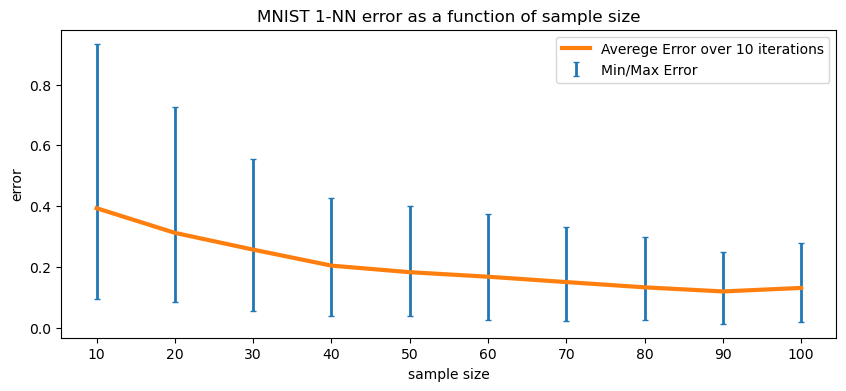

In [70]:
ks = range(1,12)
plot_fixed_k_1(err=err)

### Question 1.e

In [71]:
errors = [get_avg_err(200, k) for k in ks]

m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200


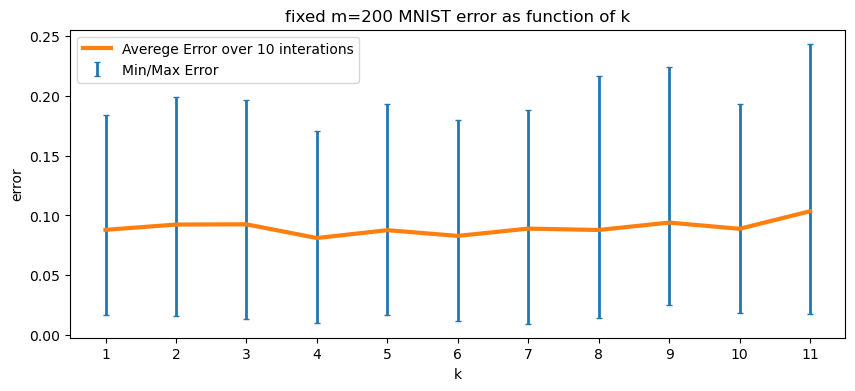

In [72]:
plot_fixed_m_200(err=errors)

### Question 1.f

In [73]:
corrupt_errors = [get_avg_err(200, k, corrupt=True) for k in ks]

m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200


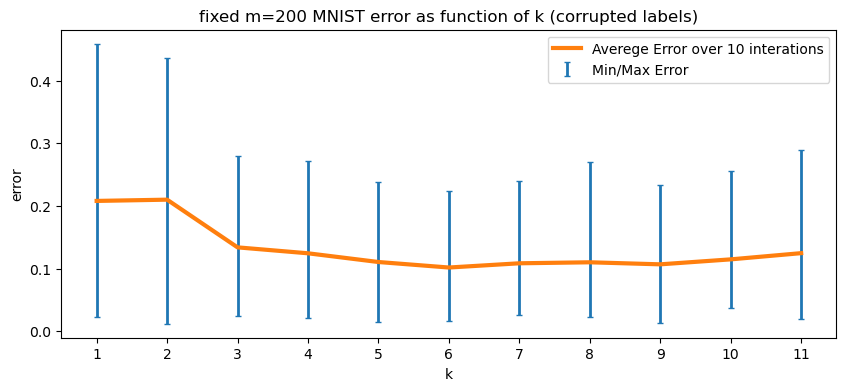

In [74]:
plot_fixed_m_200(corrupt=True, err=corrupt_errors)